<a href="https://colab.research.google.com/github/songseokbeom/ML_study/blob/master/2_2_perceptron_model_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://archive.ics.uci.edu/ml/'\
                 'machine-learning-databases/iris/iris.data',
                 header=None)
df.tail()

y = df.iloc[0:100, 4].values # y is numpy array (by.df.values)
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values


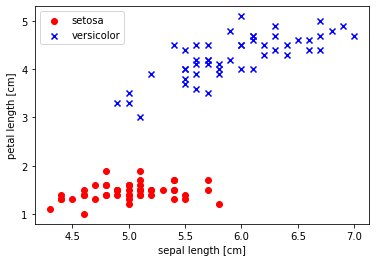

In [26]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [0]:
class perceptron(object):

  def __init__(self, learning_rate = 0.01, iter=50, random_state = 1):
    self.lr=learning_rate
    self.iter=iter
    self.random_state=random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]+1)
    self.errors = []

    for a in range(self.iter):
      error = 0
      for xi, yi in zip(X, y):
        update = self.lr * (yi - self.predict(xi))
        self.w[1:] = self.w[1:] + update * xi
        self.w[0] = update
        error += int(update != 0.0)
      self.errors.append(error)
  
  def net_input(self, X):
    return np.dot(X, self.w[1:]) + self.w[0]

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)


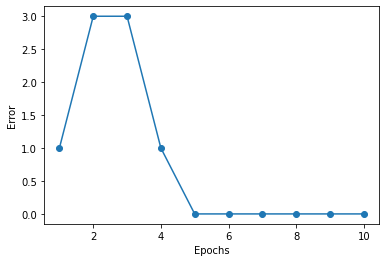

In [28]:
model = perceptron(learning_rate=0.1, iter=10)
model.fit(X, y)
plt.plot(range(1, len(model.errors)+1),
         model.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

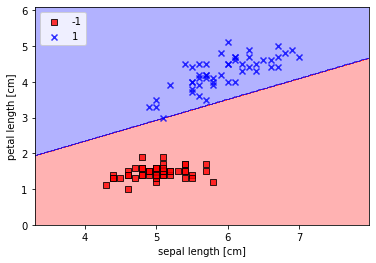

In [29]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
  markers=('s', 'x', 'o', '^', 'v')
  colors=('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))]) # np.unique: find unique elements in numpy array

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')
    
plot_decision_regions(X, y, classifier=model)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()